# Week 10 Notes

## Animation

### Using Matplotlib notebook
One way to animate a plot is to use `%matplotlib notebook`.  See the example below for how to do this.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from matplotlib.animation import FuncAnimation
from matplotlib import colors

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


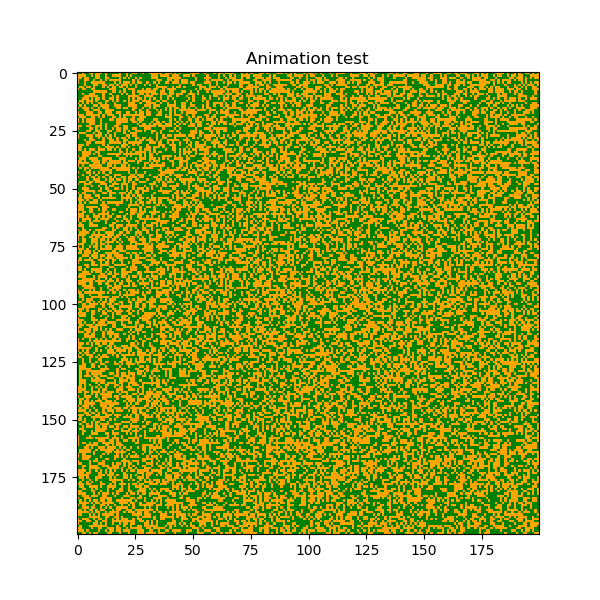

In [6]:
x = np.zeros((200,200), dtype = int)

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):                                         #  Test function
    global x                                            #  Allows the variable x to be treated as a global variable

    x=np.random.random(x.shape)                         #  Produce a random 2D array
    im.set_data(x)                                      #  Used to retreive data to be plotted, in this case x
    return im


anim = FuncAnimation(fig=fig, func=animate, interval=100, blit=True, repeat=False)
plt.show()

### Using embedded HTML
This method has an extra step in order to view the animation.  With this method, we need to import the `HTML` function to embed HTML code into the notebook.  The cell below uses almost the exact same code as the previous animation.  I have however changed how each frame is updated in the `animate` function.

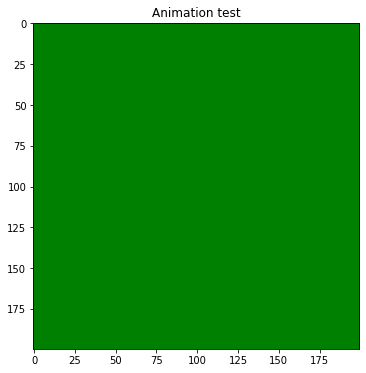

In [2]:
x = np.zeros((200,200), dtype = int)

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'orange', 'black'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):                                         #  Test function
    global x                                            #  Allows the variable x to be treated as a global variable

    for a,b in [(a,b) for a in range(200) for b in range(200) if a+b == i]:
        x[a,b]+=1                                       #  Adds a diagonal of 1's
    im.set_data(x)                                      #  Used to retreive data to be plotted, in this case x
    return im


anim = FuncAnimation(fig=fig, func=animate, frames=400, interval=100, repeat=False)
                                                        #  We use the optional frames arguement to tell Python how many
                                                        #  frames to create.
                                                        #  Also, no blit
plt.show()

In [16]:
anim_html = anim.to_jshtml()                            #  This builds HTML code for the animation

In [17]:
from IPython.display import HTML                        
HTML(anim_html)                                         #  The HTML function allows us to embed the html code in the notebook

The following code writes an .html file in the current directory that contains the code for the animation.  The animation can then be viewed by opening the newly-created .html file in the browswer.

In [11]:
f=open('anim.html','w') #  Opens a new file called anim.html and stores the open file in the variable f.  The 'w' means
                        #  the file is opened and can be written to.
f.write(anim_html)      #  Writes the HTML code stored in the variable anim_html to the file anim.html
f.close()               #  Closes the file.  Always close the file when you are done with it.

## Counting the neighboring 1's

In [10]:
A = np.random.randint(0,2,(10,10))
print(A)

[[0 0 0 0 1 1 1 0 1 1]
 [0 0 1 1 0 0 1 1 1 0]
 [1 1 1 1 0 1 0 1 1 0]
 [0 1 0 1 0 1 0 0 1 0]
 [0 0 0 1 0 0 0 1 1 1]
 [1 0 0 0 1 0 1 0 0 1]
 [1 0 1 0 0 1 0 1 1 1]
 [0 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [1 1 1 0 1 0 1 0 1 1]]


In [12]:
sub = A[3:6,5:8]    #  3x3 array surrounding (4,6) entry in A
print(sub)

[[1 0 0]
 [0 0 1]
 [0 1 0]]


In [13]:
sub.sum()

3

In [14]:
B = np.random.randint(0,3,(10,10))
print(B)

[[0 1 1 0 0 1 2 2 2 2]
 [2 1 0 1 0 1 2 2 0 2]
 [1 1 0 2 1 0 2 0 1 1]
 [0 1 0 0 2 2 0 0 2 0]
 [2 1 2 2 2 1 0 2 0 1]
 [0 1 1 1 0 0 2 1 2 0]
 [1 0 1 0 1 0 1 2 0 0]
 [0 2 0 1 1 0 1 1 1 1]
 [1 0 0 2 1 2 1 1 0 2]
 [0 0 0 1 0 2 0 2 2 1]]


In [15]:
sub = B[3:6,5:8]    #  3x3 array surrounding (4,6) entry in B
print(sub)

[[2 0 0]
 [1 0 2]
 [0 2 1]]


In [16]:
count = 0
for i,j in [(i,j) for i in range(3) for j in range(3)]:
    if sub[i,j] == 1:
        count += 1
print(count)

2


In [18]:
sub = B[5:8,8:11]
print(sub)

[[2 0]
 [0 0]
 [1 1]]


In [22]:
def count_1s(array):
    count = 0
    m,n = np.shape(array)
    for i,j in [(i,j) for i in range(m) for j in range(n)]:
        if array[i,j] == 1:
            count += 1
    return count

In [23]:
count_1s(sub)

2